## BERTScore for Multilingual Analysis

This notebook contains the codes and procedures of data analysis when conducting multilingual analysis of my thesis.

Reference: Özbolat, H. (2023, September 28).Text Summarization: How to Calculate BertScore. *Medium*.

https://haticeozbolat17.medium.com/text-summarization-how-to-calculate-bertscore-771a51022964

In [1]:
! pip install bert-score

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/


In [2]:
! pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/


## Similarity score between Chinese texts and English summaries

In [3]:
# Step 1: Import the required libraries
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Step 2: Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Step 3: Define the two texts to compare
#Passage FF_E_1
text1= "Breaking news! came the voice from the TV in the agency. We got this just in. Apparently, Dazai Osamu, former executive of the notorious Port Mafia reigning over the harbor of Yokohama and its underground, was just seen walking around in the middle of the Yokohama bay. Eyewitness hadn’t been able to clearly see what the man was doing; they assume that he might have planted more of his bombs. The stage is set and the curtain opens. Yokohama is in the middle of it all and Atsushi is nowhere to be found, Dazai is on the run and just about everything is going wrong. The Hunting Dogs are on the prowl and a lot of the mess doesn't make sense, if it ever did."
text2= "The text is a news report about Dazai Osamu, a former executive of the Port Mafia, who is on the run and possibly planting bombs in Yokohama bay."

# Step 4: Prepare the texts for BERT
inputs1 = tokenizer(text1, return_tensors="pt", padding=True, truncation=True)
inputs2 = tokenizer(text2, return_tensors="pt", padding=True, truncation=True)

# Step 5: Feed the texts to the BERT model
outputs1 = model(**inputs1)
outputs2 = model(**inputs2)

# Step 6: Obtain the representation vectors
embeddings1 = outputs1.last_hidden_state.mean(dim=1).detach().numpy()
embeddings2 = outputs2.last_hidden_state.mean(dim=1).detach().numpy()

# Step 7: Calculate cosine similarity
similarity = np.dot(embeddings1, embeddings2.T) / (np.linalg.norm(embeddings1) * np.linalg.norm(embeddings2))

# Step 8: Print the result
print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Similarity between the texts: 0.8602


In [8]:
#Passage FF_E_2
text3= "Every once in a while, when he allowed himself to indulge, Hannibal would enter his mind palace, wander the halls until he found the leather bound book he had so closely associated with that day and he would remember. He would remember how Will had stood with hunched shoulders, in a suit that might have looked like it fit, to the trained eye was a nightmare of seams. How glasses had obscured big blue eyes at first and how unruly dark brown curls had been crudely attempted to be tamed. While in reality, it never went past that first look across the conference hall, sometimes, the doctor would allow himself the alternate path of events, where he crossed the floor to introduce himself. The thrill of integrating himself with the very people who were seeking to catch him. He imagined how he would slowly and seamlessly distance himself and Will from the younger man’s colleagues, how he would coax more wine down that scruff-covered throat. How they would end up in Hannibal’s hotel room by the end of the night. But that wasn’t what had happened, instead, Hannibal had kept his distance, not yet willing to risk getting caught for the chance to look into those thoughtful, empathetic, deeply malleable, blue eyes."
text4= "Hannibal reminisces about a past encounter with Will and fantasizes about their potential relationship"

inputs3 = tokenizer(text3, return_tensors="pt", padding=True, truncation=True)
inputs4 = tokenizer(text4, return_tensors="pt", padding=True, truncation=True)

outputs3 = model(**inputs3)
outputs4 = model(**inputs4)

embeddings3 = outputs3.last_hidden_state.mean(dim=1).detach().numpy()
embeddings4 = outputs4.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings3, embeddings4.T) / (np.linalg.norm(embeddings3) * np.linalg.norm(embeddings4))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6644


In [9]:
#Passage FF_E_3
text5= "Gem stopped for a moment, catching her breath. She couldn't do anything. Now Gem is clever but in moments of high stress she isn't as much. Hence why she didn't notice that the water was a bit too clear, and she didn't hear the motor of a boat. She couldn't do anything as the net caught her tail, making her trapped. Then it started to pull up. She couldn't move or get out, and trust her she tried. As she was brought out of the water, hanging by the tail from a net, pain starting to form from the strain, her weapons had long fallen out of its halter. She was met with actual humans on the small boat before her, staring at her with evil grins, ‘they don't look like the nice humans’ she thought. Then Gem swore to herself that this was the last time she wasn't going to pay attention to her surroundings."
text6= "Gem is caught in a net and pulled out of the water by humans on a boat."

inputs5 = tokenizer(text5, return_tensors="pt", padding=True, truncation=True)
inputs6 = tokenizer(text6, return_tensors="pt", padding=True, truncation=True)

outputs5 = model(**inputs5)
outputs6 = model(**inputs6)

embeddings5 = outputs5.last_hidden_state.mean(dim=1).detach().numpy()
embeddings6 = outputs6.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings5, embeddings6.T) / (np.linalg.norm(embeddings5) * np.linalg.norm(embeddings6))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7249


In [10]:
#Passage FF_E_4
text7= "Hey handsome, what can I get you? Wooyoung approached the man who took a seat amongst the many free barstools, most people too consumed with being on the dance floor to sit around at the bar. The comment obviously took the customer by surprise, as his eyes widened just slightly. Wooyoung merely waited for the man across from him to snap out of his thoughts, smiling slightly as he pulled back the sleeves to his already exposing shirt. Not only was the v-line cut extremely low, but it was nearly see through, which was hard to tell in the darkness of the club, but when the light hit just right basically everything was revealed. I-I'll just have a Coke.The man gave his order with a hesitant voice, just barely audible over the music that continued to fill the room. Ah, you the designated driver? Wooyoung tried to make conversation, quickly ducking below the bar to reach for the appropriate can. He resurfaced after grabbing a glass as well, popping the tab and pouring the carbonated drink into the glass, pushing it gently across to the customer with a smile."
text8 = "Wooyoung, a bartender, flirts with a customer at the bar."

inputs7 = tokenizer(text7, return_tensors="pt", padding=True, truncation=True)
inputs8 = tokenizer(text8, return_tensors="pt", padding=True, truncation=True)

outputs7 = model(**inputs7)
outputs8 = model(**inputs8)

embeddings7 = outputs7.last_hidden_state.mean(dim=1).detach().numpy()
embeddings8 = outputs8.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings7, embeddings8.T) / (np.linalg.norm(embeddings7) * np.linalg.norm(embeddings8))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6867


In [11]:
#Passage FF_E_5
text9= "Charles had already left to do his morning chores I was both excited and a little worried. I was excited because it would be the opening of my hospital. My hospital. Well, it would be Mimi Salvatore's hospital. Now I had two other surnames, but it was easier this way. Charles had assured me that neither he nor Adam minded. Charles had taken care of everything that had to do with building and staffing the hospital. We had already been on a private tour, and today would be the Grand Opening. My life was far from dull. I sometimes hoped it would be a little less exciting or dangerous but I had no say in so many things that happened around me, so I just had to go with the flow so to speak, and take it all whatever life threw at me, and it did throw me a lot. The thing that always bothered me nowadays was Damon. His behavior had become increasingly difficult to predict in the last couple of years. The shed sessions had escalated and gotten rougher, and he was always finding reasons to take me to the shed. Or beat me up in the gym. It seemed that I had spent a considerable amount of the last five years, or so, recovering from his treatments. And still, I couldn't let go. Charles and Adam had now got me addicted to their pheromones, and that was another thing that was nagging at Damon."
text10= "The narrator is excited about opening a hospital but also worried about their relationship with Damon."

inputs9 = tokenizer(text9, return_tensors="pt", padding=True, truncation=True)
inputs10 = tokenizer(text10, return_tensors="pt", padding=True, truncation=True)

outputs9 = model(**inputs9)
outputs10 = model(**inputs10)

embeddings9 = outputs9.last_hidden_state.mean(dim=1).detach().numpy()
embeddings10 = outputs10.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings9, embeddings10.T) / (np.linalg.norm(embeddings9) * np.linalg.norm(embeddings10))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6582


In [12]:
#Passage FF_E_6
text11= "The small poison vial weighed heavy, hidden between her breasts as Calista walked through the gold-gilded corridor to her master’s private quarters. All of her sacrifice, planning, and conniving strategies were about to come to fruition- years in the making. She squeezed her eyes shut and released a shaky breath before she entered the grand room with a familiar feigned smile plastered on her face. Ah, Calista. Vargus purred from his comfortable seat directly across from the doors. Per usual he was dressed in his fine black silks and chunky bronze necklace, his bronze curls coiffed back and matching beard trimmed. A pair of mint green eyes lustfully gazed over her as she entered. He stood, his monumental frame dwarfed by the sheer enormity of the room. His private quarters were furnished with only the best that his many travels had to offer. All black lacquer furniture with a polished black and white checkered marble floor to match. Royal purple curtains hung from impressive-sized windows, cradling the shimmering night sky. A fire to the side casted a copper orange glow over Vargus’ face- sharpening his features and reminding her further that he was deadly. Vargus. She smiled sweetly, the same smile that unintentionally caught his eye over four decades ago, not that she looked a day over twenty-three. Come sit. He smiled as well, but his words were not a pleasantry they were a command."
text12= "Calista enters Vargus' private quarters with a plan to kill him."

inputs11 = tokenizer(text11, return_tensors="pt", padding=True, truncation=True)
inputs12 = tokenizer(text12, return_tensors="pt", padding=True, truncation=True)

outputs11 = model(**inputs11)
outputs12 = model(**inputs12)

embeddings11 = outputs11.last_hidden_state.mean(dim=1).detach().numpy()
embeddings12 = outputs12.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings11, embeddings12.T) / (np.linalg.norm(embeddings11) * np.linalg.norm(embeddings12))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6299


In [13]:
#Passage FF_E_7
text13= "Twenty-something Luule Tam's life in the village of Kasmu in northern Estonia is fairly normal, even if magic and aliens exist in this world. After encountering Oleg, an alien who happens to be Head of the Red Guards, in a certain incident, the two of them would beome friends with Luule often helping Oleg solve cases. As time goes on, their friendship gradually blossoms into something much more. Recently, Luule has started dating Oleg. Despite the shift in status quo, solving cases is something that has remained unchanged. This time, Luule receives info from Oleg of a local crime network involved in smuggling. Together, the duo must find leads on the criminals' operations and stop them for good before it's too late."
text14= "Luule and Oleg's friendship turns into something more, and they continue to solve cases together."

inputs13 = tokenizer(text13, return_tensors="pt", padding=True, truncation=True)
inputs14 = tokenizer(text14, return_tensors="pt", padding=True, truncation=True)

outputs13 = model(**inputs13)
outputs14 = model(**inputs14)

embeddings13 = outputs13.last_hidden_state.mean(dim=1).detach().numpy()
embeddings14 = outputs14.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings13, embeddings14.T) / (np.linalg.norm(embeddings13) * np.linalg.norm(embeddings14))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.8165


In [14]:
#Passage FF_E_8
text15= "What would you choose if you were to make a decision between your life and the life of another? Would yours weight heavy enough to overweight the other? Whichever you choose, you are wrong. But, someone else had something a lot more different than this to say. And that was none other than a mere wanderer who ran into a glorious empire on a very high mountain named Hei, with an emperor as imperial and grand yet selfish. However, there seemed to be a trouble within the empire, which was an enormous mighty dragon breathing fire and spreading chaos wherever it landed and up until that very day, it had managed to damage the empire and claimed lots of lives, causing terror upon the entire mountain for such a long time. Yet one day, this one gallant warrior showed up in the empire and was the only person present that was able to challenge the dragon. After a long wait for his mighty opponent, the dragon finally showed its face upon a fiery valley leading to the summit of the mountain, where a temple was built on, waiting for this next chosen warrior to dare a combat with. So, the warrior unsheathed his silver sword from its scabbard and beheaded the dragon at once before it could even make another move. Of course, the emperor and his people were truly overjoyed for this mysterious yet mighty warrior’s arrival in their empire and running to their rescue, so they threw a feast to celebrate the day of the warrior’s arrival and the very first victory they had ever had against the dragon."
text16= "The text explores the theme of choosing between one's own life and the life of another, as well as a story about a warrior who defeats a dragon."

inputs15 = tokenizer(text15, return_tensors="pt", padding=True, truncation=True)
inputs16 = tokenizer(text16, return_tensors="pt", padding=True, truncation=True)

outputs15 = model(**inputs15)
outputs16 = model(**inputs16)

embeddings15 = outputs15.last_hidden_state.mean(dim=1).detach().numpy()
embeddings16 = outputs16.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings15, embeddings16.T) / (np.linalg.norm(embeddings15) * np.linalg.norm(embeddings16))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7634


In [15]:
#Passage FF_E_9
text17= "After a year of my new life full of magic, I was exhausted.Exhausted, but invigorated.Life had changed a lot since I had bombed my own home.For one, the magical government, MIASS, has declared me a passive threat, which basically meant I wasn’t kill-on-sight, but I was kill-on-first-sign-of-aggression. It wasn’t fun, but there wasn’t much I could do about that. Yet. If I hadn’t taken Mab’s offer, I would have been six feet under before I could so much as flick my gun up.Being the Champion of Winter had its perks, it seemed. Supernatural folk gave me more respect - no more was I just ‘a half-blood’ or ‘some wannabe wizard’. I was Fate Frost, the Claws of Winter. I had power, I had will, I had respect. It was getting to my head a bit, I think, but not enough to be worrisome."
text18= "The narrator reflects on their new life as the Champion of Winter and the changes it has brought."

inputs17 = tokenizer(text17, return_tensors="pt", padding=True, truncation=True)
inputs18 = tokenizer(text18, return_tensors="pt", padding=True, truncation=True)

outputs17 = model(**inputs17)
outputs18 = model(**inputs18)

embeddings17 = outputs17.last_hidden_state.mean(dim=1).detach().numpy()
embeddings18 = outputs18.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings17, embeddings18.T) / (np.linalg.norm(embeddings17) * np.linalg.norm(embeddings18))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6461


In [16]:
#Passage FF_E_10
text19= "That the wizard had come to speak with it, the illithid could attempt to rationalize. It knew Gale was voraciously curious – a commendable trait, in practice, as knowledge and the pursuit of the expanded mind was compatible with illithid philosophy – and the prospect of speaking to one of its kind with some mortal recollections to complement its present state was likely intriguing. It was the druid’s presence the mind flayer had not expected. It was the druid’s presence that had caused the strongest outburst of those strange sensations it should not be able to feel. His face had flickered in its memories in a thousand images, shattering and reforming as its brain attempted to reconstruct connections of meaning between the flashes of memory, and it had felt its digestive system churn. His voice had caused an unnatural itching in its auditory canals, summoning recollections of feeling the sound vibrate against a back of a different shape. The mind flayer knew that seeing it must have caused the elf pain; if it was able to feel as much as it did because of his presence in its prison, the elf surely felt much worse."
text20= "The mind flayer is confused by the presence of a wizard and a druid, as they trigger strange sensations and memories."

inputs19 = tokenizer(text19, return_tensors="pt", padding=True, truncation=True)
inputs20 = tokenizer(text20, return_tensors="pt", padding=True, truncation=True)

outputs19 = model(**inputs19)
outputs20 = model(**inputs20)

embeddings19 = outputs19.last_hidden_state.mean(dim=1).detach().numpy()
embeddings20 = outputs20.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings19, embeddings20.T) / (np.linalg.norm(embeddings19) * np.linalg.norm(embeddings20))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7868


In [18]:
#Passage FF_E_11
text21= "Once Upon a Time...Deep beneath ruins of a once great kingdom now covered by a wicked forest laid the Kingdom of Eternal Night. The ruler of this dark kingdom was Ahriman-Lord of Lies, Father of Darkness and Deceit, Embodiment of Destruction and Nothingness, God of Evil and Death, and Personification of Chaos! Within his personal workshop; Ahriman was creating something very special and his minions were curious on what it was. Their Master had created a great mirror but this was no ordinary mirror...it can show other worlds and dimensions, and the Dark Lord can communicate with anyone, travel through and bring anyone or anything through the mirror."
text22= "The text describes a dark kingdom ruled by Ahriman and his creation of a special mirror."

inputs21 = tokenizer(text21, return_tensors="pt", padding=True, truncation=True)
inputs22 = tokenizer(text22, return_tensors="pt", padding=True, truncation=True)

outputs21 = model(**inputs21)
outputs22 = model(**inputs22)

embeddings21 = outputs21.last_hidden_state.mean(dim=1).detach().numpy()
embeddings22 = outputs22.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings21, embeddings22.T) / (np.linalg.norm(embeddings21) * np.linalg.norm(embeddings22))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.8331


In [26]:
#Passage FF_E_12
text23= "Diwäia, maid of stars, could only smile, Upon seeing the source of malady That vexed divine and bright Eilythia so. Diwäia spoke in reassuring tones: My child, this bloody stain upon your thigh Is naught worthy to be concerned about! So calmly lay your weary mind to rest, Dispel all worry and relax, my child, For every moon a woman’s flower blooms. This lunar flow from deep within your nethers Is neither an imp’s curse nor dark enchantment Cast with malicious mind upon your form, But a blessing, my child, for come one’s blood One’s womanhood begins to bloom in full. Girlhood is but a fleeting thing, you see, Brief and ephemeral, naught but a passing Moment in time, soon swept away like chaff Against the ever-flowing gusts of wind. Worry not, little maid, the bloody flow Will soon abate, and having come to pass, You shall soon flourish into womanhood, Like a blossoming flower within its bloom."
text24= "Diwäia reassures Eilythia about her menstrual cycle, explaining that it is a sign of womanhood."

inputs23 = tokenizer(text23, return_tensors="pt", padding=True, truncation=True)
inputs24 = tokenizer(text24, return_tensors="pt", padding=True, truncation=True)

outputs23 = model(**inputs23)
outputs24 = model(**inputs24)

embeddings23 = outputs23.last_hidden_state.mean(dim=1).detach().numpy()
embeddings24 = outputs24.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings23, embeddings24.T) / (np.linalg.norm(embeddings23) * np.linalg.norm(embeddings24))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6875


In [19]:
#Passage FF_E_13
text25= "Harold slid off the side of his bed, his fall to the ground cushioned by his pillow. He plastered his body against the ground and wriggled and wriggled until he could reach under his bed. He swept his arm this way and that and from out under the bed a telescope and a ball and a magic wand rolled out. But his purple crayon was not under his bed. Harold frowned at the magic wand. It wasn’t his purple crayon but maybe… just maybe…? Harold scrambled to pick up the magic wand and waved it to and fro like a conductor in front of a great hall. Purple crayon, purple crayon, come to me, oh purple crayon! he chanted. Harold waited in the silence, eyes and ears open and alert. But his purple crayon did not appear. But a clatter and a bang did."
text26= "Harold is searching for his purple crayon and uses a magic wand to try and find it."

inputs25 = tokenizer(text25, return_tensors="pt", padding=True, truncation=True)
inputs26 = tokenizer(text26, return_tensors="pt", padding=True, truncation=True)

outputs25 = model(**inputs25)
outputs26 = model(**inputs26)

embeddings25 = outputs25.last_hidden_state.mean(dim=1).detach().numpy()
embeddings26 = outputs26.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings25, embeddings26.T) / (np.linalg.norm(embeddings25) * np.linalg.norm(embeddings26))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7476


In [20]:
#Passage FF_E_14
text27= "Bluey Heeler ran after her classmate and best friend, Chloe Dalmation. I found some more items for our museum! she exclaimed, with a handful of pinecones. These can be the things that people look at when they come into the museum. Ah yes! Chloe said. I’ll put them on display over here. And then I can be the one who finds things for the museum and you can be the one who shows museum guests around! Bluey added. That sounds great. I’ll be the tour guide! Chloe said, her tail started to wag. Yeah, that’s it, the tour guide! Bluey announced. She looked over at their collection of exhibits and thought for a moment. No one was lining up to take a tour. Right now I can set up the stuff, and you can find people to come to our museum, Bluey suggested. That’s a great idea! Chloe said. She ran off to look for their classmates so that people would join the game."
text28= "Bluey Heeler and Chloe Dalmation are setting up a museum together."

inputs27 = tokenizer(text27, return_tensors="pt", padding=True, truncation=True)
inputs28 = tokenizer(text28, return_tensors="pt", padding=True, truncation=True)

outputs27 = model(**inputs27)
outputs28 = model(**inputs28)

embeddings27 = outputs27.last_hidden_state.mean(dim=1).detach().numpy()
embeddings28 = outputs28.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings27, embeddings28.T) / (np.linalg.norm(embeddings27) * np.linalg.norm(embeddings28))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7453


In [21]:
#Passage FF_E_15
text29= "At the age of 6, he found out that his birthday is in June. And when he was 7 years old, he realized that this is not important. Right at the moment when his mother died. In a dark ruin, under a spiral staircase. He understood many things in those minutes. His mother said that he is now the only 7-year-old child on earth. She said she was sorry that she gave birth to him. She said he named him Sunoo. And when he asked what it meant, she answered: I don't know. His mother died of hunger. Malnutrition that lasted a lifetime. Whatever she found, gave it to Sunoo to eat. Sunoo was eating alone and she was watching."
text30= "The text is about a young boy named Sunoo who realizes important things about his life and the death of his mother."

inputs29 = tokenizer(text29, return_tensors="pt", padding=True, truncation=True)
inputs30 = tokenizer(text30, return_tensors="pt", padding=True, truncation=True)

outputs29 = model(**inputs29)
outputs30 = model(**inputs30)

embeddings29 = outputs29.last_hidden_state.mean(dim=1).detach().numpy()
embeddings30 = outputs30.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings29, embeddings30.T) / (np.linalg.norm(embeddings29) * np.linalg.norm(embeddings30))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.8154


## Similarity Score Distribution

In [25]:
import numpy as np

# Similarity score data
scores = np.array([0.8602, 0.6644, 0.7249, 0.6867, 0.6582,
                  0.6299, 0.8165, 0.7634, 0.6461, 0.7868,
                  0.8331, 0.6875, 0.7476, 0.7453, 0.8154])

# Clean data: Remove NaN and infinite values
clean_scores = scores[np.isfinite(scores)]

# Compute basic statistics
mean_score = np.mean(clean_scores)
median_score = np.median(clean_scores)
variance_score = np.var(clean_scores)
std_deviation = np.std(clean_scores)

# Calculate maximum and minimum similarity scores
max_similarity = np.max(clean_scores)
min_similarity = np.min(clean_scores)

# Output statistical results
print(f"Mean: {mean_score:.4f}")
print(f"Median: {median_score:.4f}")
print(f"Variance: {variance_score:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")
print(f"Maximum Similarity Score: {max_similarity}")
print(f"Minimum Similarity Score: {min_similarity}")

Mean: 0.7377
Median: 0.7453
Variance: 0.0051
Standard Deviation: 0.0714
Maximum Similarity Score: 0.8602
Minimum Similarity Score: 0.6299


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


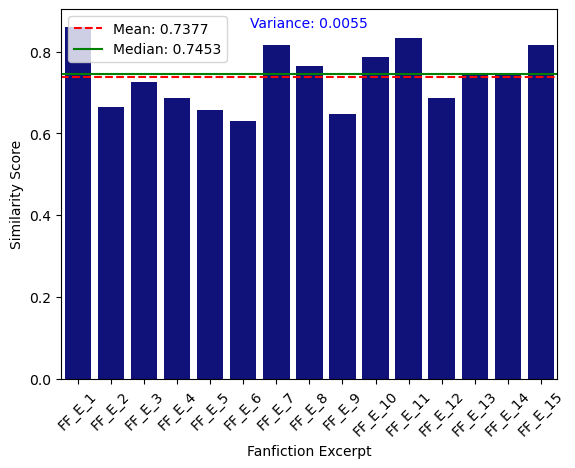

In [7]:
# Create Data
data = {
    "Fanfiction Excerpt": ["FF_E_1", "FF_E_2", "FF_E_3", "FF_E_4", "FF_E_5",
                "FF_E_6", "FF_E_7", "FF_E_8", "FF_E_9", "FF_E_10",
                "FF_E_11", "FF_E_12", "FF_E_13", "FF_E_14", "FF_E_15"],
    "Similarity": [0.8602, 0.6644, 0.7249, 0.6867, 0.6582,
                   0.6299, 0.8165, 0.7634, 0.6461, 0.7868,
                   0.8331, 0.6875, 0.7476, 0.7453, 0.8154]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate statistics
mean_value = df['Similarity'].mean()
median_value = df['Similarity'].median()
variance_value = df['Similarity'].var()

# Plot bar graph
plt.figure()
bar = sns.barplot(x="Fanfiction Excerpt", y="Similarity", data=df, color='darkblue')
plt.xlabel("Fanfiction Excerpt")
plt.ylabel("Similarity Score")
plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.4f}')
plt.axhline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.4f}')

# Add variance in the chart's title or annotation
plt.annotate(f'Variance: {variance_value:.4f}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', color='blue')

# Display legend
plt.legend()

plt.xticks(rotation=45)
plt.show()

In [9]:
# Filter articles that are above both the mean and median values
above_mean_median = df[(df['Similarity'] > mean_value) & (df['Similarity'] > median_value)]

# Filter articles that are not above both the mean and median values
below_mean_median = df[~((df['Similarity'] > mean_value) & (df['Similarity'] > median_value))]

# Count the number of articles
above_count = above_mean_median.shape[0]
below_count = below_mean_median.shape[0]

# Output results
above_articles = above_mean_median['Fanfiction Excerpt'].tolist()
below_articles = below_mean_median['Fanfiction Excerpt'].tolist()

print("Number of articles above both mean and median values:", above_count)
print("Articles above both mean and median values:", above_articles)
print("Number of articles not above both mean and median values:", below_count)
print("Articles not above both mean and median values:", below_articles)

Number of articles above both mean and median values: 7
Articles above both mean and median values: ['FF_E_1', 'FF_E_7', 'FF_E_8', 'FF_E_10', 'FF_E_11', 'FF_E_13', 'FF_E_15']
Number of articles not above both mean and median values: 8
Articles not above both mean and median values: ['FF_E_2', 'FF_E_3', 'FF_E_4', 'FF_E_5', 'FF_E_6', 'FF_E_9', 'FF_E_12', 'FF_E_14']


## Similarity score between Chinese texts and English summaries

In [39]:
!pip install transformers torch

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/


In [40]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModel.from_pretrained("bert-base-multilingual-cased")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [47]:
def get_embedding(text):
    # Encode the text
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    # Generate the text vector
    with torch.no_grad():
        model_output = model(**encoded_input)
    # Use the average of the last layer's outputs as the text vector
    embeddings = model_output.last_hidden_state.mean(dim=1)
    return embeddings

# Example FF_C_1
# Chinese text
text1 = "赤井秀一死了。基尔杀的。由你这位前叛徒的好友去确认一下。你应该不会出问题吧，苏格兰？他选择的居然是基尔？我还以为会是你给他‘最后一吻’呢，琴酒。对面重重啧了一声，挂断电话。黑发蓝眼的男人与旁边偷听的陌生人对上视线，耸耸肩笑了笑，没再去看对方尴尬的表情，摁灭屏幕，收起手机，抬头望向前方已经开始排队的登机口。由吉隆坡国际机场出发、前往日本东京的旅客请注意，您乘坐的JL414次航班现在开始登机。请带好您的随身物品，出示登机牌，由3号登机门登机。祝您旅途愉快。谢谢！"
# English summary
text2 = "The text is a conversation between two characters, discussing the death of someone named Red Aki and their plans to investigate."

# Get vectors for both texts
embed1 = get_embedding(text1)
embed2 = get_embedding(text2)

# Calculate cosine similarity
cosine_similarity = torch.nn.functional.cosine_similarity(embed1, embed2)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.4587092995643616


In [48]:
# Example FF_C_2

text3 = "请坐。青年笑出满口白牙，乐呵呵的样子倒真像那些打着算盘的生意人。我叫黄子弘凡，你叫我黄子便可。曹恩齐把遮面的斗笠摘下来，随手放在桌上，略鞠一躬，曹恩齐，请多指教。不必客气。黄子弘凡神色微微一动，示意他坐下，大大咧咧地拍了拍他的肩膀，提手斟好一杯热茶，小店粗茶，招待不周，还望谅解。黄掌柜才是客气了。曹恩齐也不推让，一口饮尽，在略带惊讶和欣赏的目光中补充，方才小厮既说掌柜不再加座，听完你的邀约又毫无疑义，我想这彩云楼的掌柜也不会有他人了。掌柜真是年轻有为。就不能是我作为食客盛情难却吗？黄子弘凡笑得更开心了，黄子便可。如果想低调些，下次可以换身行头。曹恩齐扫了眼他白袍上细密精致的刺绣，忽地压低声音，黄子弘凡，一位故人托我给彩云楼送个口信。故人？他不动声色地反问，给自己也续上清茶，端起瓷杯抿了一口。是名道长，名叫蒲熠星。他说，以防万一。黄子弘凡的表情凝固了一瞬，眼里闪过悲伤之色，手竟是难以控制地颤抖起来。他垂下头，收起笑容后的面庞带了肃杀的意味，阿蒲的消息还是太迟了。南波门，被灭了。此言一出，曹恩齐浑身一冷。"
text4 = "A young man named Yellow Child Ben is speaking with another character, Zhang Xianqi, in a teahouse. They discuss the disappearance of someone named Peng Xingxing"

embed3 = get_embedding(text3)
embed4 = get_embedding(text4)

cosine_similarity = torch.nn.functional.cosine_similarity(embed3, embed4)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.49782794713974


In [49]:
# Example FF_C_3

text5 = "然而，这周五的早上注定是脱离常数的一天。女人伸个懒腰，露出赏心悦目的女性身体曲线，还有此刻的美景，男人享受这两件东西。突然，女人神色变了，下一秒她的牙齿开始打颤，别的人很难注意这样的细节，但枕边人可以，从眼神里他看出女人的眼神已经完全被恐惧占领。女人用一种男人从未听过的声音颤颤巍巍地说：Johnny，你看，那边躺着的是不是个人啊？越过呆呆瘫坐在草坪上的报案人，抬起黄色警戒线，Marty照例先去看了一眼受害人。除了个别特殊情况，比如赤身裸体跪姿戴鹿角的女人，大部分受害人相比之下还是相对平凡不起眼的。就像这个受害人，和他年轻相仿，伤在后脑，于是正面躺着的时候几乎看不出什么伤痕，只是他的眼睛圆睁着，似乎还在惊愕死亡就这么来了，而死亡又让那一瞬的惊愕凝固，最后在现场勘察人员的相机里结成一张纸。死亡时间是什么时候？由肝脏温度推断，死亡时间为昨天晚上大约十点左右。Marty在他的笔记本上写了点什么，这个笔记本不大也不小，写完他下意识往自己来时的方向看了一眼。"
text6 = "A woman is terrified by something she sees and asks a man for his opinion. The man observes the body and determines the cause of death. Another character, Rust, joins them and they discuss the crime scene. They find a ticket from a hospital cafeteria, indicating that the victim may have been an employee."

embed5 = get_embedding(text5)
embed6 = get_embedding(text6)

cosine_similarity = torch.nn.functional.cosine_similarity(embed5, embed6)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.6581968665122986


In [50]:
# Example FF_C_4

text7 = "但丁去取水花的时间比预想中长，他磨磨蹭蹭地拿着水走进来，眼神略带探究的意味，来回扫视着翠西的眼睛和小腹。翠西被他盯得不自在，疑惑地蹙起眉头，内心升腾起不祥的预感，与此同时也做好了心理建设，去接住但丁又粗手粗脚搞砸了某些小事的坦白。怎么了？先喝水。但丁把水杯塞进她的手里，堵住她的话。直到亲眼看着她喝下，从她手中接过水杯放好，才继续说下去：你有没有觉得头晕乏力？嗯。看他郑重其事的态度，翠西也认真了几分。全身发热，恶心想吐，嗜睡多梦，这些都有吗？都有……那最近情绪起伏大吗？"
text8 = "Dante takes a long time to get water for Cressida, and she feels uncomfortable with his gaze. They discuss her symptoms and Dante asks if she is pregnant."

embed7 = get_embedding(text7)
embed8 = get_embedding(text8)

cosine_similarity = torch.nn.functional.cosine_similarity(embed7, embed8)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.5950776934623718


In [51]:
# Example FF_C_5

text9 = "桑布雷克的夏季温和少雨，坐在马车上的狄翁却显得有些躁动不安，他一次又一次地调整坐姿，时而倚在窗上盯着远处的白龙城，时而又靠在椅背上对着车顶发呆，双手不断地摩挲他柔软的天鹅绒座椅套，命令它们在湖蓝色和深蓝色之间改变颜色。您刚刚有些失态，我的皇子。狄翁伸出手摆了摆，说：“不必再说，何况在你面前也不是第一次。能拥有这份特权是我的荣幸，先生。”泰伦斯眨眨眼，手在空中划了一个小圈，向狄翁行礼。你有时候真的很讨厌，比如说现在。他稍稍前倾，脱下手套扣住了他的手，十指穿过他的指缝。泰伦斯顺从地配合他，让二人手上的茧子吻在一起。马车颠簸，狄翁离开座位顺势跨坐在泰伦斯身上。忠心的亲卫队长没被占领的左手按住狄翁的背，好让他的团长坐得安稳一点。泰伦斯听到狄翁满意的叹息声，头埋进泰伦斯的颈窝里，金色的发丝擦过他的鼻尖，棕发的骑士闻到了光的味道。我爱你。您怎么突然说这个？因为我爱你，就像你爱我一样。那我爱的狄翁殿下能解释一下刚才发生了什么吗？你会知道的，但在此之前，你得先想一下我们在修道院学校的时候的事儿。为什么？"
text10 = "Dionysus is restless and anxious in his carriage, constantly adjusting his seating position. He is distracted by the distant city of White Dragon and fidgets with the upholstery."

embed9 = get_embedding(text9)
embed10 = get_embedding(text10)

cosine_similarity = torch.nn.functional.cosine_similarity(embed9, embed10)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.5701050162315369


In [52]:
# Example FF_C_6

text11 = "早上好，苏我家主，苏我夫人。大理石墙壁的光泽让她在闷热的夏日感到一丝寒意，苏我家主与夫人都在读报纸。伊砂，你来啦？苏我夫人放下报纸，快坐下吧，要是饿了就先吃。伊砂挤出一个笑：谢谢夫人，我还不饿。苏我夫人举起报纸，伊砂你都十八岁了，再不嫁人可就晚了哦。女人的青春贬值可快了。伊砂强忍恶心，做出一副害羞的表情：夫……夫人说的是。家主见到她的反应，洋洋自得地笑了笑：女人就是麻烦，别到最后生不了孩子了还嫁不出去。家主用刀叉时，脸上的赘肉总是会跟着手臂的动作抖动。他对待食物与钱就像对地位比自己低的人一样，迫不及待地想要享用。家主说得没错。伊砂觉得自己已经什么都吃不下了。既然这样的话，夫人听到这话，高兴地往伊砂的方向转了一点，最近刚好有位大人在物色妻子，伊砂你要不要去？伊砂睁大了眼睛：现在吗？那位大人很有权势，你嫁给他可算是享福了。苏我夫人在把烂摊子交给伊砂时，最爱装作嫉妒她的样子。她花了几十万保养自己的脸，但苹果肌与嘴唇两旁的肌肉都很僵硬，让人看不出来她是不是真的在笑。伊砂也笑了笑：那就太感谢家主与夫人了，您们对我这么好，还愿意把我嫁给好人家，真是不知道该怎么报答。伊砂，你这么说我真高兴，夫人歪着眉毛对她挤出一个用力的笑，我们家里最近经济紧张，不过你的嫁妆，我们会尽力的。毕竟是我们伊砂的婚礼，总得像个贵族小姐吧？没错，像个贵族小姐。父母的遗产早就被亲戚分走了，她在苏我家的价值与一幅画差不多。嫁人后，她又会有多少价值呢？您们的恩情，我会用一辈子报答。伊砂说着假话，抹着真心的眼泪。"
text12 = "Suo's family invites Ise to eat and discusses her marriage prospects."

embed11 = get_embedding(text11)
embed12 = get_embedding(text12)

cosine_similarity = torch.nn.functional.cosine_similarity(embed11, embed12)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.4335113763809204


In [53]:
# Example FF_C_7

text13 = "科考队深入静峪脑后音讯全无，失联两个星期后只有一男性幸存者被救yu涝河口附近村落，但神志不清。幸存者恢复知觉后，讲述了一则颇为怪诞的故事，他声称，科考队在秦岭深处发现了殷商遗址。后续在此人带领下再带队前往却只得破碎的青铜刻板，痕迹模糊，成于大概三千年前，但是否为商朝旧物仍有待考究。奇怪，殷商的东西虽然名贵但并非不可探查，况且这些青铜板上的图案我从来不曾见过，听起来有些自负，但我毕竟是考古系研究生，主要方向恰好就是中古文明，所以我没见过，就说明这件事并不受重视，以至于继续研究的人都没有。好奇心前所未有的膨胀起来，我拆开了剩余三张信纸，墨迹十分清秀，让我真正大吃一惊的，却是上面的内容。"
text14 = " A team of archaeologists who discover ancient artifacts in the mountains, but the surviving member's account is unclear and confusing."

embed13 = get_embedding(text13)
embed14 = get_embedding(text14)

cosine_similarity = torch.nn.functional.cosine_similarity(embed13, embed14)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.5135265588760376


In [54]:
# Example FF_C_8

text15 = "母亲死后曹叡在东宫变成一个幽灵。大家惹不得他，毕竟是皇帝的儿子，但甄夫人的事人人皆知，陛下并不是那种不会迁怒于人的严谨性子，不如说曹氏一族都天然地有点滥情，在爱和恨上追求一种穷尽全力，像新修洛阳宫时上的漆，沾上就很难洗掉，洗掉也总有气味，为了往后余生而让人不得不避闲。东宫于是门前冷落，却也不完全是件坏事——曹叡那时候受一种奇怪病症困扰，说不了一整个长句子。他们是这样发现这回事的：有一天早上，大概就是甄夫人死后一个月的时候，婢女们服侍他洗漱，帮他篦头发，梳子用旧了，他头发又太长不方便，那天很不巧地折断了一个齿。曹叡闭着眼睛听到自己耳边极近极近那清脆的一声响，一根弦断了一样强烈地感到不吉利。他睁开眼睛，要他们赶快去换一个：怎么断了？快去换——换……他说到这，后面的字卡住一样吐不出来了。曹叡错愕之中捂住自己的嘴，那些原本纷纷拿着他头发的女子们诚惶诚恐地看着他，在意识到不对之后纷纷跪了下来。更多的梳子慌乱之中落到地上。她们以为是自己惹平原侯发怒，而曹叡坐在榻上想：你们这么紧张做什么？可这句话他也说不出，只剩看着她们，少女们低着头，头上发髻装饰的流苏在没有风的宫殿里颤动，玲玲地响，直到他忍无可忍地站起来绕开面前的人向外面走去，漆黑的头发和衣摆一起拖在地上。他走出门去，喊宫里的内侍。今天他不能见人了。今天……今天……曹叡张嘴，决定不显得自己是一个结巴，把一句话分成三个部分。不舒服。他指指自己，让他们，他又指指外面，回去。第二天宫里所有人都知道了这一回事。郭夫人派人过来慰问，曹叡对着那个女官很恭敬，知道自己名义上的母亲其实是替他血缘上的父亲来的，只想把她快点打发走。他向她解释自己没甚么大碍，话语无意间碎成好几块。女官了然，告退了，过几天郭夫人又送了更多东西来，都被封存入库。"
text16 = "After the death of his mother, Emperor Cao Rui becomes a ghost in the East Palace. The people around him are aware of his father's promiscuity and try to avoid him. One day, while being groomed by servants, he accidentally breaks a comb and is unable to speak after that. He becomes frustrated and leaves the palace, refusing to see anyone for the rest of the day."

embed15 = get_embedding(text15)
embed16 = get_embedding(text16)

cosine_similarity = torch.nn.functional.cosine_similarity(embed15, embed16)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.7267919182777405


In [55]:
# Example FF_C_9

text17 = "只差一点了。马汗青死死盯着着桌案上的鎏金锦盒，挑开直冲胸口的利箭，额角细密的汗水证明了他费尽千辛万苦才抛开府兵闯到这里，书房虽然无人把守却遍布机关，稍不留意就可能命丧黄泉。可目标已再眼前，只要再近一步，教他劈了这块害人的木头毁了那封伪造的密信，舞太师就没法拿出马将军通敌叛国的“证据”，十万马家军就能恢复清白，马将军也无需再受牢狱之灾。心口忽然传来一阵绞痛。糟了。马汗青心下一沉，那些人想必已经抓住了自己放出的幻像，再过不久就会追到这里，而自己还没能寻到这机关阵的破绽，与其坐以待毙，倒不如拼个玉石俱焚，比上马将军的清白和十万马家军的前程，死一个马汗青又算不得什么。"
text18 = " A character named Ma Hanqing who is in a dangerous situation and contemplates his options."

embed17 = get_embedding(text17)
embed18 = get_embedding(text18)

cosine_similarity = torch.nn.functional.cosine_similarity(embed17, embed18)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.4455030560493469


In [56]:
# Example FF_C_10

text19 = "在旅程几乎要过了一半时，二人才终于见到了沿途第一个有人烟的村镇。然而，本应是为旅人补充行装的地方，实际的情况却十分糟糕。阿蕾奇诺让哥伦比娅留在鞍垫上，自己则下了马，又走到左前方，牵着缰绳慢慢向前步行着。镇上四处游荡着衣衫褴褛的人，宛若一具具的空壳，连眼睛都几乎不曾转动一下。只有当看见衣着光鲜的来客时，那些瘦得如同骨架般的人，才会稍微张张嘴，表现出一点人的生气来。他们为什么会变成这样？哥伦比娅在马背上看着逐渐围过来乞讨的人群，问道。战争。女皇正在向西征战。打仗所需要的粮草，财钱，人力，最终都会化为劳动者的重负。它为皇室带来声权，为贵族带来利益，而后又将隐藏在阴影中的税负，饥馑，压在每一个底层的人民身上。阿蕾奇诺应着少女的话，从裘袍内侧掏出几枚银币，递给眼前的乞人。他们为什么不去其他地方？他们无处可去。自出生起，农奴就被绑定在了土地上。他们属于耕田，属于庄园，属于领主——但唯独不属于自己。"
text20 = "The text describes the protagonist's journey through a village during a war."

embed19 = get_embedding(text19)
embed20 = get_embedding(text20)

cosine_similarity = torch.nn.functional.cosine_similarity(embed19, embed20)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.39287811517715454


In [57]:
# Example FF_C_11

text21 = "新历初始，桑布雷克与周边两国一同修订了全新的律法。在战争中重新团结起来的三国同盟，如今正在努力恢复破碎的世界。就算是一百年之后，大路上流传着各种各样的旧历传说。很多事情是被忘却的事实，很多事情是虚掩着真相的线索。修道院的一位年轻学徒告别家乡，从偏远的龙巢边缘前往桑布雷克的新首都新奥列夫列姆的圣白龙城。他像一位苦行僧人，穿着简单潦草的布鞋沿着石子路向北而行。陆行鸟被他牵在身后，是他唯一的旅伴，他不忍让这托着重物的可怜小家伙再增添自己的重量。于是他慢慢悠悠地走出平原，穿过瀑布，直到他们望到了海边悬崖的瞭望塔。他翻开行囊中的书籍，那里记载着战争前世界地图的模样。他所处这片庄稼稀少的荒芜之地，一百年前仍有变异的怪物作乱，两百年前甚至被淹没在神秘的高浓度以太中难以前行。他反复在口中咀嚼以太这两个字，对这来自过去的未知充满了好奇与恐惧。"
text22 = "A young student who leaves his hometown to travel to the new capital of Sanburek, accompanied by a bird. Along the way, he encounters various landscapes and wonders about the mysteries of the past.'"

embed21 = get_embedding(text21)
embed22 = get_embedding(text22)

cosine_similarity = torch.nn.functional.cosine_similarity(embed21, embed22)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.6402018070220947


In [58]:
# Example FF_C_12

text23 = "老朋友，十年的监禁生涯结束啦，你感觉如何？重获新生？还是说，有点不舍？这声音轻佻但有力，不像是凡间所拥有的。它向着倾听者颅内发出，有着不容抗拒的侵略意味，在耳朵的内腔里翻滚一番，引得整个人与之共鸣起来。赫尔墨斯。奥德修斯认出来者，有些意外地看向他，你怎么会在这里？我来看看我们可怜的小狗，在这荒凉的小岛上过得好不好呀。赫尔墨斯的语气微微上挑，如同他自身一样漫不经心。他蹬着飞鞋在空中愉悦地打着转，宛如一只羽翼丰满的小鸟。但奥德修斯知道，他和雅典娜不同，并不近似于猫头鹰，而是更加散漫和自由。赫尔墨斯乐意一天为一天买账，一刻为一刻过活，比起正派的智慧，更乐意耍小聪明。他看上去倒是个容易亲近的神明，但其实是另一种层面的难对付。但是，再怎么游手好闲，也不会无缘无故地来打趣自己。这其中一定是有原因、有预兆、有指引的，奥德修斯这么想到。聪慧如奥德修斯，很快领会了神使的意图。“是你劝说卡吕普索放我走的，那么，这是神的旨意吗？既然如此，我是否可以猜测，在不久的未来，我终于能够如愿，回到那伊萨卡吗？"
text24 = "The text is a conversation between two characters, Odysseus and Hermes, discussing the end of Odysseus's ten-year imprisonment."


embed23 = get_embedding(text23)
embed24 = get_embedding(text24)

cosine_similarity = torch.nn.functional.cosine_similarity(embed23, embed24)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.4710947275161743


In [60]:
# Example FF_C_13

text25 = "他们已经在监控室坐了一个半小时。阿拉娜和奇尔顿从始至终盯着监控屏幕，奇尔顿手头还有一支录音笔，而玛格口头上说着不感兴趣，却在六点整提着些食物走进房间，还给阿拉娜带了杯饮料；杰克半小时前离开，他没有空闲时间看一个精神病人画画、一个不说话的小孩涂鸦，还有一个不幸用子宫让他们俩产生联系的倒霉蛋对着地板发呆。这个世界上总有比观察自闭症儿童——和成年人更重要的事，奇尔顿宣告投降，诸位，回见。他也匆匆离开，只剩阿拉娜和玛格面面相觑。所以这是自闭症。玛格转向屏幕，看到威尔起身，为女儿收拾画笔，怪不得没见她说过话。"
text26 = "The characters have been sitting in the monitoring room for an hour, with Alana and Chirton constantly watching the monitors. Magg is uninterested but brings food to Alana. Jack leaves after half an hour, frustrated by the time spent observing a mute child and a woman painting. Chirton gives up and leaves, leaving only Alana and Magg. They discuss autism and wonder why they haven't heard the girl speak."

embed25 = get_embedding(text25)
embed26 = get_embedding(text26)

cosine_similarity = torch.nn.functional.cosine_similarity(embed25, embed26)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.6551955342292786


In [61]:
# Example FF_C_14

text27 = "年轻的恶魔猎人在找到维吉尔的时候他正蜷缩在斯巴达老宅的一楼角落，还没有完全装修过的老宅内部空空荡荡，年幼的维吉尔就披着一件脏兮兮的窗帘，蜷缩在楼梯下的阴影里。尼禄挠了挠头，他蹲下身子才能勉强看清楚这个小小阴影里的全貌，年轻人一边腹诽着一定得把这里用水泥封好免得老鼠在这里做了窝，一边小心翼翼地试图把维吉尔抱起来。小孩睡得很浅，几乎是尼禄的手刚碰到他，他就陡然惊醒了。嘿，嘿，嘿，我没有恶意，好吗？尼禄举起双手，维吉尔艰难地拔出刀，阎魔刀的刀尖颤巍巍地指着尼禄的鼻子：你不记得我了？老天，这都是什么事儿——你还记得你怎么来到这儿的吗？闭嘴！年幼的维吉尔厉声呵斥他：告诉我你的目的！我的目的就是把你带回去……不，不是那种，操，我的目的是把你带到一个安全的地方……尼禄叹了口气：听上去更可疑了……你想去见但丁吗？虽然他已经老得不像样了。维吉尔紧盯着面前的男人，他知道自己身上大概出了点问题，穿越，或者是时间倒流。小孩醒在红墓市的边郊，这里和他记忆里的很不一样。他艰难跋涉过来的时候目之所及的一切已经告诉了他答案，红墓市没有这么多毁坏的建筑，街上的装饰和广告也和他见过的不同。你是谁？少年问：我和你是什么关系？"
text28 = "A young demon hunter finds Vigil in an unfinished house and tries to take him away."

embed27 = get_embedding(text27)
embed28 = get_embedding(text28)

cosine_similarity = torch.nn.functional.cosine_similarity(embed27, embed28)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.4610283076763153


In [62]:
# Example FF_C_15

text29 = "清晨的薄雾渐渐散去，阿斯托利亚能看到四面八方布满了帐篷，看来这次英国承办的世界杯很受欢迎。尽管魔法部尽由一些愚蠢的人发号施令，但能聚焦这么多来自世界各地的人并保证他们的安全，阿斯托利亚还是很佩服的。在她们的周围，有几个插着星条旗的大帐篷，门口摆满了酒瓶，这使达芙妮提起了她的上唇；还有个圆筒状尖顶的白色建筑（其他人把它叫做穹庐），几个大汉在外面握着类似鞭子的东西，向烤架一挥动，肉就发出被烤熟的滋滋响声，阿斯托利亚不禁张大了嘴巴。她们继续向前走，路上发现了不同国家的更多帐篷，一个模样像是法国人的毛头小子还向阿斯托利亚笑着说了句外国话，但被达芙妮赶走了。阿斯托利亚被几个塞拉利昂女巫玩的一种不知名的纸牌吸引住了，她正要俯下身看个究竟，达芙妮拍了拍她的肩膀。"
text30 = "The text describes the scene at a World Cup event, with various tents and activities taking place."

embed29 = get_embedding(text29)
embed30 = get_embedding(text30)

cosine_similarity = torch.nn.functional.cosine_similarity(embed29, embed30)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.4737837314605713


In [65]:
# Similarity score data
scores = np.array([0.4587, 0.4978, 0.6582, 0.5951, 0.5701,
                   0.4355, 0.5135, 0.7268, 0.4455, 0.3929,
                   0.6402, 0.4711, 0.6552, 0.4610, 0.4738])

# Clean data: Remove NaN and infinite values
clean_scores = scores[np.isfinite(scores)]

# Compute basic statistics
mean_score = np.mean(clean_scores)
median_score = np.median(clean_scores)
variance_score = np.var(clean_scores)
std_deviation = np.std(clean_scores)

# Calculate maximum and minimum similarity scores
max_similarity = np.max(clean_scores)
min_similarity = np.min(clean_scores)

# Output statistical results
print(f"Mean: {mean_score:.4f}")
print(f"Median: {median_score:.4f}")
print(f"Variance: {variance_score:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")
print(f"Maximum Similarity Score: {max_similarity}")
print(f"Minimum Similarity Score: {min_similarity}")

Mean: 0.5330
Median: 0.4978
Variance: 0.0094
Standard Deviation: 0.0971
Maximum Similarity Score: 0.7268
Minimum Similarity Score: 0.3929


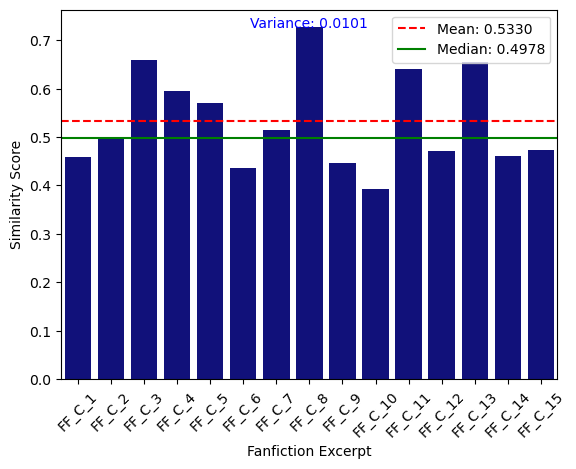

In [11]:
# Create Data
data = {
    "Fanfiction Excerpt": ["FF_C_1", "FF_C_2", "FF_C_3", "FF_C_4", "FF_C_5",
                "FF_C_6", "FF_C_7", "FF_C_8", "FF_C_9", "FF_C_10",
                "FF_C_11", "FF_C_12", "FF_C_13", "FF_C_14", "FF_C_15"],
    "Similarity": [0.4587, 0.4978, 0.6582, 0.5951, 0.5701,
                   0.4355, 0.5135, 0.7268, 0.4455, 0.3929,
                   0.6402, 0.4711, 0.6552, 0.4610, 0.4738]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate statistics
mean_value = df['Similarity'].mean()
median_value = df['Similarity'].median()
variance_value = df['Similarity'].var()

# Plot bar graph
plt.figure()
bar = sns.barplot(x="Fanfiction Excerpt", y="Similarity", data=df, color='darkblue')
plt.xlabel("Fanfiction Excerpt")
plt.ylabel("Similarity Score")
plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.4f}')
plt.axhline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.4f}')

# Add variance in the chart's title or annotation
plt.annotate(f'Variance: {variance_value:.4f}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', color='blue')

# Display legend
plt.legend()

plt.xticks(rotation=45)
plt.show()


In [12]:
# Filter articles that are above both the mean and median values
above_mean_median = df[(df['Similarity'] > mean_value) & (df['Similarity'] > median_value)]

# Filter articles that are not above both the mean and median values
below_mean_median = df[~((df['Similarity'] > mean_value) & (df['Similarity'] > median_value))]

# Count the number of articles
above_count = above_mean_median.shape[0]
below_count = below_mean_median.shape[0]

# Output results
above_articles = above_mean_median['Fanfiction Excerpt'].tolist()
below_articles = below_mean_median['Fanfiction Excerpt'].tolist()

print("Number of articles above both mean and median values:", above_count)
print("Articles above both mean and median values:", above_articles)
print("Number of articles not above both mean and median values:", below_count)
print("Articles not above both mean and median values:", below_articles)

Number of articles above both mean and median values: 6
Articles above both mean and median values: ['FF_C_3', 'FF_C_4', 'FF_C_5', 'FF_C_8', 'FF_C_11', 'FF_C_13']
Number of articles not above both mean and median values: 9
Articles not above both mean and median values: ['FF_C_1', 'FF_C_2', 'FF_C_6', 'FF_C_7', 'FF_C_9', 'FF_C_10', 'FF_C_12', 'FF_C_14', 'FF_C_15']
